# Fold My Socks

> In my laundry basket, I have 14 pairs of socks that I need to pair up. To do this, I use a chair that can fit nine socks, at most. I randomly draw one clean sock at a time from the basket. If its matching counterpart is not already on the chair, then I place it in one of the nine spots. But if its counterpart is already on the chair, then I remove it from the chair (making that spot once again unoccupied) and place the folded pair in my drawer.
> 
> What is the probability I can fold all 14 pairs without ever running out of room on my chair?

From [FiveThirtyEight](https://fivethirtyeight.com/features/can-you-fold-all-your-socks/)

This seems too fun not to simulate. Also I don't have any intuition how to solve directly. State machine? Markov Chain? I'm going to simulate for several possible chair sizes, up to but excluding 14 (which would give us probability 1).

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange, random
from collections import Counter

def run_trial(num_pairs, chair_size):
    basket = [y for x in range(num_pairs) for y in [x, x]]
    chair = set()
    while len(basket) > 0:
        pick = basket.pop(randrange(len(basket)))
        if pick not in chair:
            if len(chair) == chair_size:
                return 0
            chair.add(pick)
        else:
            chair.remove(pick)
    return 1

In [93]:
out_dict = {}
for x in range(6, 14):
    results, good, total = [], 0, 0
    for i in range(5000):
        total += 1
        good += run_trial(14, x)
        results.append(good/total)
    out_dict[x] = results


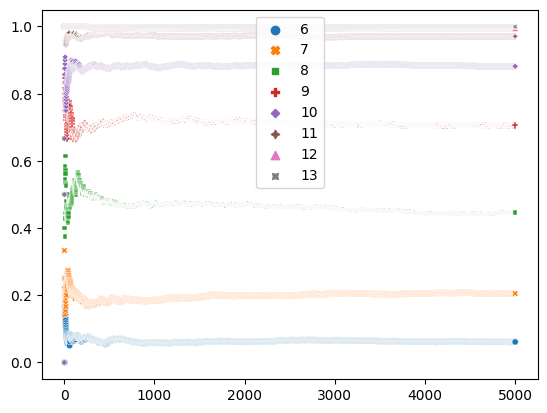

In [99]:
ax = sns.scatterplot(out_dict, s=20)
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5,1))

In [106]:
print(out_dict[9][-1])

0.7056


There's about a 70% chance of completing the folding without returning a sock to the basket. More interesting than that, the chart shows some sigmoid behavior as you vary the size of the chair. This is observed in how the chair sizes cluster at the top and bottom of this chart.

I didn't get a chance to revisit the problem this week, but like the simulation, the featured solution from [John Silverman](https://joshmaxsilverman.github.io/2022-10-09-sock-table/) looks too fun not to implement. I think one of the base cases needs correction, $s + d < 10$. Also we can do some minor optimizations by treating $s = 0$ as a base case.

In [107]:
def draw_trial(s, d, size):
    if s == size+1: return 0
    if s + d < size+1: return 1
    if s == 0: return draw_trial(s+1,d-1, size) * 2 * d / (s+2*d)
    return draw_trial(s-1, d, size) * s / (s+2*d) + draw_trial(s+1,d-1, size) * 2 * d / (s+2*d)
draw_trial(0, 14, 9)

0.7004899349764069